## Comparação com experiência ($N=3$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Observações ###

In [2]:
tl,xall,xbll,xcll = np.loadtxt(
    "/home/ljma/MEOCloud/fis/2024/fslinky/lab_data/video_data/20231128_DSC_1763_N3_v3.txt",
    unpack=True)

In [3]:
pxal = np.polyfit(tl, xall, 9)
pxbl = np.polyfit(tl, xbll, 9)
pxcl = np.polyfit(tl, xcll, 9)
xal = lambda t: np.polyval(pxal, t)
xbl = lambda t: np.polyval(pxbl, t)
xcl = lambda t: np.polyval(pxcl, t)

### Soluções numéricas ###

In [4]:
def rhs2(t, y, k, m, g, N):
    x, v = np.split(y, 2)
    xdot = v
    vdot = np.zeros_like(v)
    vdot[0] = -N*g + k/m * (x[1] - x[0])
    vdot[1:-1] = k/m * (x[2:] - 2*x[1:-1] + x[:-2])
    vdot[-1] = k/m * (x[-2] - x[-1])
    return np.hstack((xdot, vdot))

In [5]:
N = 3
KK = 0.4399
k = KK * (N - 1)
L0 = 0.4639
l0 = L0 / (N - 1)
g = 9.81
m = 56.6E-3

In [6]:
i = np.arange(N)
x0 = np.zeros(N)
v0 = np.zeros(N)
y0 = np.hstack((x0, v0))
soluc = solve_ivp(rhs2, [0, 0.4], y0, args=[k, m, g, N], max_step=0.01)
tn = soluc.t
xn, vn = (np.vsplit(soluc.y, 2))
pxan = np.polyfit(tn,xn[0],6)
pxbn = np.polyfit(tn,xn[1],6)
pxcn = np.polyfit(tn,xn[2],6)
xan = lambda t: np.polyval(pxan, t)
xbn = lambda t: np.polyval(pxbn, t)
xcn = lambda t: np.polyval(pxcn, t)

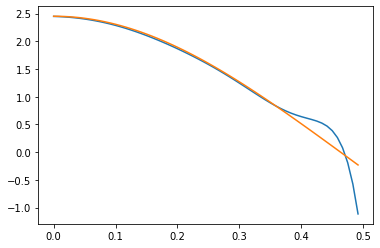

In [9]:
plt.plot(tl, xal(tl+0.05), tl, xal(tl[0])+xan(tl));

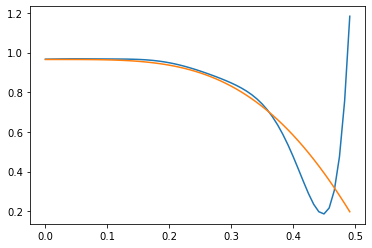

In [8]:
plt.plot(tl, xbl(tl+0.05), tl, xbl(tl[0])+xbn(tl));

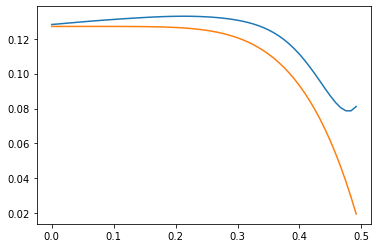

In [9]:
plt.plot(tl, xcl(tl+0.05), tl, xcl(tl[0])+xcn(tl));

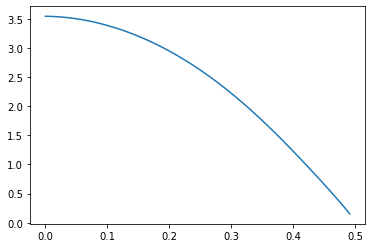

In [11]:

plt.plot(tl,xal(tl+0.05)+xbl(tl+0.05)+xcl(tl+0.05));

In [13]:
start=6
xcm = np.polyfit(
    tl[start:],
    (xall[start:]+xbll[start:]+xcll[start:])/3,
    2)
print(2*xcm[0])

-9.212553104462502


In [20]:
xcm

array([-4.60032188,  0.37003156,  1.17600651])

In [10]:
tl[0:]

array([0.      , 0.008333, 0.016666, 0.024999, 0.033332, 0.041665,
       0.049998, 0.058331, 0.066664, 0.074997, 0.08333 , 0.091663,
       0.099996, 0.108329, 0.116662, 0.124995, 0.133328, 0.141661,
       0.149994, 0.158327, 0.16666 , 0.174993, 0.183326, 0.191659,
       0.199992, 0.208325, 0.216658, 0.224991, 0.233324, 0.241657,
       0.24999 , 0.258323, 0.266656, 0.274989, 0.283322, 0.291655,
       0.299988, 0.308321, 0.316654, 0.324987, 0.33332 , 0.341653,
       0.349986, 0.358319, 0.366652, 0.374985, 0.383318, 0.391651,
       0.399984, 0.408317, 0.41665 , 0.424983, 0.433316, 0.441649,
       0.449982, 0.458315, 0.466648, 0.474981, 0.483314, 0.491647])